# Logit Regression Laboratory

Un estudio sobre condiciones dermatológicas con datos del ICM Machine Learning Repository.

### Presentado por

- Natalia Carolina Beleno Carrascal
- Whayner Eduardo Porras Rodríguez

### Código fuente y librerías



El código fuente del proyecto se manejo cómo librerías para tener una organización adecuada. La documentación de las funciones puede ser encontrada en cada archivo fuente. Se llevo la trazabilidad del desarrollo en la plataforma github, en la cual encuentra el repositorio https://github.com/Woynert/logit-regression-lab.

Se hizo la separación de funcionalidad deacuerdo al tema que cubre y la sección del trabajo que abarca. Se siguió la filosofía de tener métodos estaticos lo cual no emplea variables globales sino que todos los datos necesarios para el calculo se pasan a través de parametros. Esto permite correr multiples tareas en paralelo sin que existan colisiones.

Las librerías implementadas incluyen las siguiente estructura. (Puede encontrar el código en el directorio `src`)

```
├── cleaning
│   ├── MissingValues.py
│   └── OutlinerUtils.py
├── learning
│   ├── Categorization.py
│   ├── Distances.py
│   ├── Preprocess.py
│   └── knn.py
└── statistics
    ├── MetaStatistics.py
    └── Statistics.py
```


In [86]:
# Above sentences help auto reload modules 

%load_ext autoreload
%autoreload 2

# Import system libraries
from random import shuffle
from typing import List
import importlib
import numpy
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Import custom libraries

import sys
sys.path.append('./src/cleaning')
sys.path.append('./src/learning')
sys.path.append('./src/statistics')

import OutlinerUtils
import MissingValues
import Preprocess
import Distances
import Categorization
import Statistics
import MetaStatistics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Here we store all global variables

class Store:
    tag_column: str = "Class"
    
    data_raw: pd.DataFrame = None
    data_tmp: pd.DataFrame = None

    data_train: pd.DataFrame = None
    data_test: pd.DataFrame = None
    
    missing_indexes: List[int] = []
    outliner_indexes: List[int] = []
    tags: List[str] = []

store = Store()

In [6]:
# Import data

store.data_raw = pd.read_csv('./data/dermatology/dermatology-with-labels.data')
store.data_raw

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C25,C26,C27,C28,C29,C30,C31,C32,C33,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


## Sección de Gráficas

(1). Se debe visualizar relaciones entre variables usando los
métodos vistos en clase.

Ver archivo adjunto (`graphs.ipynb`)

## Data Cleaning

(2). Encontrar valores atípicos o faltantes entre las columnas de los
registros. En caso de que existan, cuantificarlos (contarlos) para
conocer el número total de ello

(4). Encontrar los índices de los atípicos (si existen) y cuantificar
cuántos registros contienen estos tipos de datos.s.

In [7]:
# Get indexes for rows with missing values

store.missing_indexes = MissingValues.get_missing_values_indexes(store.data_raw)
print (f'Filas con valores faltantes: {len(store.missing_indexes)}')
print (store.missing_indexes)

Filas con valores faltantes: 8
[33, 34, 35, 36, 262, 263, 264, 265]


In [8]:
# Remove rows with missing values

store.data_raw = store.data_raw.drop(labels=store.missing_indexes, axis=0)

# Make sure all rows are numeric types

store.data_raw = store.data_raw.astype({'C33': int})

# Get outliners

store.outliner_indexes = OutlinerUtils.get_outliner_indexes(store.data_raw)
print (f'Valores atípicos: {len(store.outliner_indexes)}')

Valores atípicos: 315


## Data Preprocessing

(5). En caso que la cantidad de registros que se eliminarían supera
el 40 % del total del conjunto de datos, se procederá a eliminar
únicamente el 20 % de forma aleatoria los registros atípicos.

In [9]:
print(len(store.data_raw.index))
store.data_tmp = OutlinerUtils.delete_random_amount(
    store.data_raw
    )
print(len(store.data_tmp.index))

358
287


In [10]:
# Group by tag

store.tags = [1, 2, 3, 4, 5, 6]
data_groups = Preprocess.separate_data_by_tags(
    store.data_tmp,
    store.tags,
    store.tag_column
)
count = 0
for tag in store.tags:
    print (f"Clase {tag} contiene {len(data_groups[tag].index)} registros")
    count += len(data_groups[tag].index)

print (f"{count} registros en total")

Clase 1 contiene 87 registros
Clase 2 contiene 51 registros
Clase 3 contiene 51 registros
Clase 4 contiene 41 registros
Clase 5 contiene 41 registros
Clase 6 contiene 16 registros
287 registros en total


(3). Eliminar las clases que tienen menos de 50 registros( 50 casos
por enfermedad)

In [11]:
Preprocess.drop_rows_less_50(
    store.data_tmp,
    store.tags,
    data_groups
)
count = 0
for tag in store.tags:
    print (f"Clase {tag} contiene {len(data_groups[tag].index)} registros")
    count += len(data_groups[tag].index)
    
print (f"{count} registros en total")

Clase 1 contiene 87 registros
Clase 2 contiene 51 registros
Clase 3 contiene 51 registros
189 registros en total


In [12]:
Preprocess.balance_data_by_dropping_rows(
    store.data_tmp,
    store.tags,
    data_groups
)

count = 0
for tag in store.tags:
    print (f"Clase {tag} contiene {len(data_groups[tag].index)} registros")
    count += len(data_groups[tag].index)

print (f"{count} registros en total")

Clase 1 contiene 51 registros
Clase 2 contiene 51 registros
Clase 3 contiene 51 registros
153 registros en total


In [13]:
store.data_train, store.data_test = Preprocess.get_training_and_testing_groups(
    0.7,
    store.tags,
    data_groups
)

print (f"data_train {len(store.data_train.index)} filas. Aprox ~{int(len(store.data_train.index) / len(store.tags))} filas por clase.")
print (f"data_test {len(store.data_test.index)} filas. Aprox ~{int(len(store.data_test.index) / len(store.tags))} filas por clase.")
print (f"{len(store.data_train.index) + len(store.data_test.index)} registros en total")

data_train 105 filas. Aprox ~35 filas por clase.
data_test 48 filas. Aprox ~16 filas por clase.
153 registros en total


/misc/dev/workgit/logit-regression-lab/lab-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Modelo de Clasificación

In [14]:
point = pd.DataFrame([store.data_train.iloc[15]])

pointDistances = Distances.sort_distances(
    Distances.point_distances_against_others(
        point,
        store.data_train,
        store.tag_column,
        []
    )
)

for i, dist in enumerate(pointDistances):
    if i > 10:
        break
    print (f"Distancia a punto {dist.index}: {dist.distance}")

Distancia a punto 15: 0.0
Distancia a punto 19: 3.605551275463989
Distancia a punto 11: 3.872983346207417
Distancia a punto 23: 4.0
Distancia a punto 26: 4.123105625617661
Distancia a punto 5: 4.69041575982343
Distancia a punto 18: 4.795831523312719
Distancia a punto 25: 5.0990195135927845
Distancia a punto 4: 5.830951894845301
Distancia a punto 9: 6.082762530298219
Distancia a punto 0: 6.164414002968976


In [15]:
dist_groups = Distances.group_point_distances_by_tags(pointDistances, store.tags)
Distances.print_contestants_side_by_side (dist_groups, store.tags, 10)

t: 1.000  2.000  3.000 
0  0.000  8.660  8.307 
1  3.606  10.392  10.488 
2  3.873  10.440  11.091 
3  4.000  11.091  11.619 
4  4.123  11.874  12.207 
5  4.690  14.491  12.767 
6  4.796  16.462  13.000 
7  5.099  18.111  13.416 
8  5.831  18.138  13.784 
9  6.083  19.900  14.832 


In [32]:
point = pd.DataFrame([store.data_test.iloc[0]])
print (point)

Categorization.categorize_point(
    store.data_train,
    point,
    10, # k
    store.tags,
    store.tag_column
)

     C0  C1  C2  C3  C4  C5  C6  C7  C8  C9  ...  C25  C26  C27  C28  C29  \
309   2   3   2   0   1   0   0   0   0   1  ...    2    0    0    0    0   

     C30  C31  C32  C33  Class  
309    0    2    0   43      1  

[1 rows x 35 columns]


1

# Matriz de confusión
(6). Se debe imprimir la matriz de confusión por cada validación del
numeral anterior

In [132]:
def calculate_each_confusion_matrix(
        k: int,
        data_train: pd.DataFrame,
        data_test: pd.DataFrame,
        tags: List[str],
        tag_column: str,
        tag_objective: List[str]
    ) -> dict:
    
    confusion_matrix = {
        'TP': 0,
        'FP': 0,
        'TN': 0,
        'FN': 0
    }
    
    for i in range(len(data_test.index)):
    
        # get point
        point = pd.DataFrame([data_test.iloc[i]])
        
        # predict using model
        predicted_tag = Categorization.categorize_point(
            data_train,
            point,
            k,  # k
            tags,
            tag_column
        )
        
        # Etiqueta real
        actual_tag = point.iloc[0][tag_column]
        
        # resultado de interes
        if predicted_tag in tag_objective:
        
            # clasificacion correcta
            if predicted_tag == actual_tag:
                confusion_matrix['TP'] += 1
            else:
                confusion_matrix['FP'] += 1
        
        # no nos dió el valor de interes
        else:
            # clasificacion incorrecta
            if predicted_tag == actual_tag:
                confusion_matrix['TN'] += 1
            else:
                confusion_matrix['FN'] += 1
    
    return confusion_matrix

In [166]:
from typing import List, Dict
import pandas as pd

def calculate_global_confusion_matrix(
        k: int,
        data_train: pd.DataFrame,
        data_test: pd.DataFrame,
        data_test: pd.DataFrame,
        tags: List[str],
        tag_column: str
    ) -> Dict[str, int]:

    sum_TP=0
    sum_FP=0
    sum_TN=0 
    sum_FN = 0
    
    tag_objective = []
    
    for i in range(len(tags)):
        tag_objective.append(tags[i])
        
        confusion_matrix = calculate_each_confusion_matrix(k, data_train, data_test, tags, tag_column, tag_objective)
        
        sum_TP += confusion_matrix['TP']
        sum_FP += confusion_matrix['FP']
        sum_TN += confusion_matrix['TN']
        sum_FN += confusion_matrix['FN']
        
        tag_objective.remove(tags[i])

    
    global_confusion_matrix = {
        'TP': sum_TP,
        'FP': sum_FP,
        'TN': sum_TN,
        'FN': sum_FN
    }

    return global_confusion_matrix

Pruebas matriz de confusión

In [154]:
calculate_global_confusion_matrix(
    4,
    store.data_train,
    store.data_test,
    store.tags,
    "Class"
    )

{'TP': 47, 'FP': 1, 'TN': 94, 'FN': 2}

In [155]:
calculate_global_confusion_matrix(
    5,
    store.data_train,
    store.data_test,
    store.tags,
    "Class"
    )

{'TP': 47, 'FP': 1, 'TN': 94, 'FN': 2}

In [158]:
calculate_global_confusion_matrix(
    20,
    store.data_train,
    store.data_test,
    store.tags,
    "Class"
    )

tag_objective:  [1]
K:  20
{'TP': 14, 'FP': 5, 'TN': 26, 'FN': 3}
tag_objective:  [2]
K:  20
{'TP': 12, 'FP': 3, 'TN': 28, 'FN': 5}
tag_objective:  [3]
K:  20
{'TP': 14, 'FP': 0, 'TN': 26, 'FN': 8}


{'TP': 40, 'FP': 8, 'TN': 80, 'FN': 16}

In [161]:
calculate_global_confusion_matrix(
    12,
    store.data_train,
    store.data_test,
    store.tags,
    "Class"
    )

tag_objective:  [1]
K:  12
confusion_matrix:  {'TP': 15, 'FP': 2, 'TN': 29, 'FN': 2}
sum_TP:  15
sum_FP:  2
sum_TN:  29
sum_FN:  2
tag_objective:  [2]
K:  12
confusion_matrix:  {'TP': 15, 'FP': 2, 'TN': 29, 'FN': 2}
sum_TP:  30
sum_FP:  4
sum_TN:  58
sum_FN:  4
tag_objective:  [3]
K:  12
confusion_matrix:  {'TP': 14, 'FP': 0, 'TN': 30, 'FN': 4}
sum_TP:  44
sum_FP:  4
sum_TN:  88
sum_FN:  8


{'TP': 44, 'FP': 4, 'TN': 88, 'FN': 8}

In [165]:
calculate_global_confusion_matrix(
    30,
    store.data_train,
    store.data_test,
    store.tags,
    "Class"
    )

tag_objective:  [1]
confusion_matrix:  {'TP': 10, 'FP': 5, 'TN': 26, 'FN': 7}
tag_objective:  [2]
confusion_matrix:  {'TP': 12, 'FP': 6, 'TN': 24, 'FN': 6}
tag_objective:  [3]
confusion_matrix:  {'TP': 14, 'FP': 1, 'TN': 22, 'FN': 11}


{'TP': 36, 'FP': 12, 'TN': 72, 'FN': 24}

## Experimentación de desempeño

(7). El desempeño de este modelo debe ser encontrado al calcular
las métricas de sensibilidad, especificidad y precisión.
(8). Gráfico de curva ROC.

In [88]:
mape = Statistics.calculate_mape(
    5,
    store.data_train,
    store.data_test,
    "Class",
    store.tags
)
print (f"Mape {mape}")

Mape 0.041666666666666664


In [20]:
matriz = Statistics.calculate_confusion_matrix(
    5,
    store.data_train,
    store.data_test,
    "Class",
    store.tags
)

1 : 2
1 : 3


In [35]:
matriz = Statistics.calculate_confusion_matrix(
    4,
    store.data_train,
    store.data_test,
    store.tags,
    "Class",
    [3]
)
print (matriz)

{'TP': 15, 'FP': 0, 'TN': 31, 'FN': 2}


## Estadística

Calcular métricas TPR, FPR, necesarias para la curva ROC.

In [47]:
listMatrix = Statistics.get_multiple_confusions_per_model(
    [1, 2, 3, 4, 5],
    store.data_train,
    store.data_test,
    store.tags,
    "Class",
    [1]
)

In [83]:
lTPR, lFPR = Statistics.get_roc_data_from_model(listMatrix)

slTPR, slFPR = zip(*sorted(zip(lTPR, lFPR)))

for i in range(len(lTPR)):
    print (slFPR[i], ":", slTPR[i])


0.21875 : 0.75
0.15625 : 0.875
0.1875 : 0.9375
0.1875 : 0.9375
0.25 : 0.9375


### Métricas de desempeño

Métricas de desempeño calculadas incluyen:
- Sensibilidad
- Especificidad
- Presición

In [53]:
for matrix in listMatrix:
    Statistics.find_performance(matrix)

-1. sen: 0.93750, esp: 0.96875, pre: 0.93750
-1. sen: 1.00000, esp: 0.96875, pre: 0.94118
-1. sen: 1.00000, esp: 0.96875, pre: 0.94118
-1. sen: 1.00000, esp: 0.93750, pre: 0.88889
-1. sen: 1.00000, esp: 0.93750, pre: 0.88889


In [61]:
# El proceso de cómo se excluyen las columnas en los calculos

columns = ["C2", "C3"]
all_columns = [str(c) for c in store.data_tmp]
exclude_columns = [c for c in all_columns if c not in columns]
print(exclude_columns)

['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'Class']
['C0', 'C1', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'Class']


# Exploración de modelos

(9). Variar los parametros para intentar encontrar el modelo con el mejor rendimiento.

A continuación una recopilación de modelos. Incluido están sus Métricas, Matriz, y curva ROC.

In [65]:
listMatrix = MetaStatistics.get_multiple_confusions_per_model(
    [1, 2, 3, 4, 5],
    store.data_train,
    store.data_test,
    ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
    store.tags,
    "Class",
    [1]
)

-1. sen: 0.75000, esp: 0.78125, pre: 0.63158
-1. sen: 0.93750, esp: 0.75000, pre: 0.65217
-1. sen: 0.87500, esp: 0.84375, pre: 0.73684
-1. sen: 0.93750, esp: 0.81250, pre: 0.71429
-1. sen: 0.93750, esp: 0.81250, pre: 0.71429
-1. sen: 1.00000, esp: 0.75000, pre: 0.66667
0.21875 : 0.75
0.15625 : 0.875
0.1875 : 0.9375
0.1875 : 0.9375
0.25 : 0.9375
0.25 : 1.0


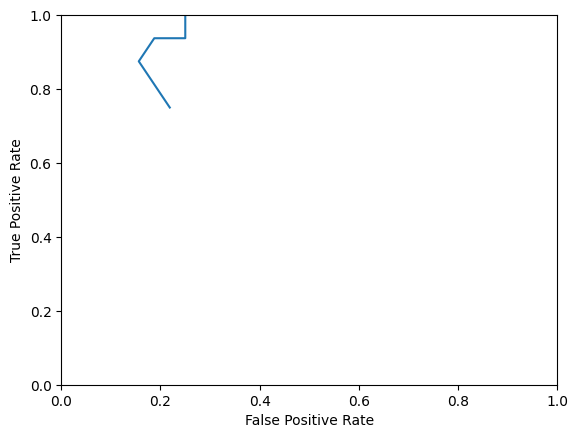

In [79]:
MetaStatistics.model_meta_function(
    [1, 2, 3, 4, 5, 6],
    store.data_train,
    store.data_test,
    ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
    store.tags,
    "Class",
    [1]
)

{'TP': 8, 'FP': 0, 'TN': 31, 'FN': 9}
-1. sen: 0.47059, esp: 1.00000, pre: 1.00000
{'TP': 8, 'FP': 0, 'TN': 31, 'FN': 9}
-1. sen: 0.47059, esp: 1.00000, pre: 1.00000
{'TP': 10, 'FP': 1, 'TN': 31, 'FN': 6}
-1. sen: 0.62500, esp: 0.96875, pre: 0.90909
{'TP': 8, 'FP': 1, 'TN': 31, 'FN': 8}
-1. sen: 0.50000, esp: 0.96875, pre: 0.88889
{'TP': 16, 'FP': 1, 'TN': 31, 'FN': 0}
-1. sen: 1.00000, esp: 0.96875, pre: 0.94118
{'TP': 16, 'FP': 1, 'TN': 31, 'FN': 0}
-1. sen: 1.00000, esp: 0.96875, pre: 0.94118
0.0 : 0.47058823529411764
0.0 : 0.47058823529411764
0.03125 : 0.5
0.03125 : 0.625
0.03125 : 1.0
0.03125 : 1.0


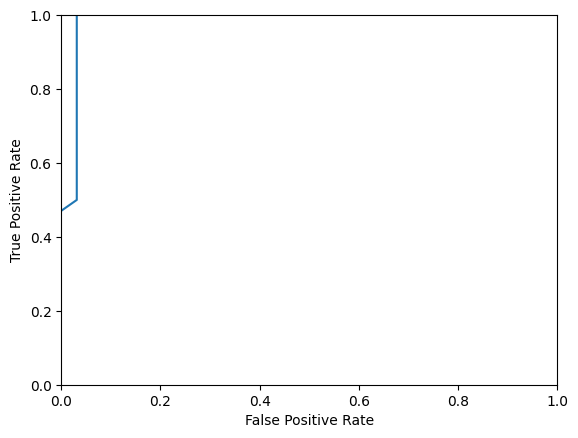

In [80]:
MetaStatistics.model_meta_function(
    [1, 2, 3, 4, 5, 6],
    store.data_train,
    store.data_test,
    ['C8', 'C9', 'C10', 'C11', 'C12'],
    store.tags,
    "Class",
    [2]
)

{'TP': 15, 'FP': 9, 'TN': 23, 'FN': 1}
{'TP': 15, 'FP': 9, 'TN': 23, 'FN': 1}
{'TP': 15, 'FP': 9, 'TN': 23, 'FN': 1}
{'TP': 15, 'FP': 13, 'TN': 19, 'FN': 1}
{'TP': 15, 'FP': 13, 'TN': 19, 'FN': 1}
{'TP': 15, 'FP': 13, 'TN': 19, 'FN': 1}
-1. sen: 0.93750, esp: 0.71875, pre: 0.62500
-1. sen: 0.93750, esp: 0.71875, pre: 0.62500
-1. sen: 0.93750, esp: 0.71875, pre: 0.62500
-1. sen: 0.93750, esp: 0.59375, pre: 0.53571
-1. sen: 0.93750, esp: 0.59375, pre: 0.53571
-1. sen: 0.93750, esp: 0.59375, pre: 0.53571
0.28125 : 0.9375
0.28125 : 0.9375
0.28125 : 0.9375
0.40625 : 0.9375
0.40625 : 0.9375
0.40625 : 0.9375


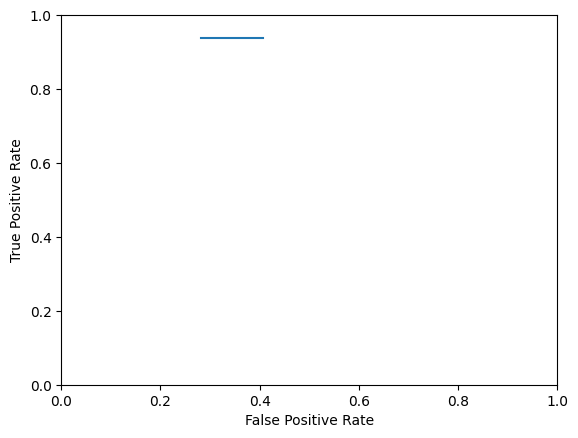

In [84]:
MetaStatistics.model_meta_function(
    [1, 2, 3, 4, 5, 6],
    store.data_train,
    store.data_test,
    ['C20', 'C19', 'C18', 'C17', 'C16'],
    store.tags,
    "Class",
    [2]
)

{'TP': 16, 'FP': 0, 'TN': 29, 'FN': 3}
{'TP': 16, 'FP': 0, 'TN': 29, 'FN': 3}
{'TP': 16, 'FP': 0, 'TN': 29, 'FN': 3}
{'TP': 16, 'FP': 0, 'TN': 29, 'FN': 3}
{'TP': 16, 'FP': 0, 'TN': 29, 'FN': 3}
{'TP': 16, 'FP': 0, 'TN': 29, 'FN': 3}
-1. sen: 0.84211, esp: 1.00000, pre: 1.00000
-1. sen: 0.84211, esp: 1.00000, pre: 1.00000
-1. sen: 0.84211, esp: 1.00000, pre: 1.00000
-1. sen: 0.84211, esp: 1.00000, pre: 1.00000
-1. sen: 0.84211, esp: 1.00000, pre: 1.00000
-1. sen: 0.84211, esp: 1.00000, pre: 1.00000
0.0 : 0.8421052631578947
0.0 : 0.8421052631578947
0.0 : 0.8421052631578947
0.0 : 0.8421052631578947
0.0 : 0.8421052631578947
0.0 : 0.8421052631578947


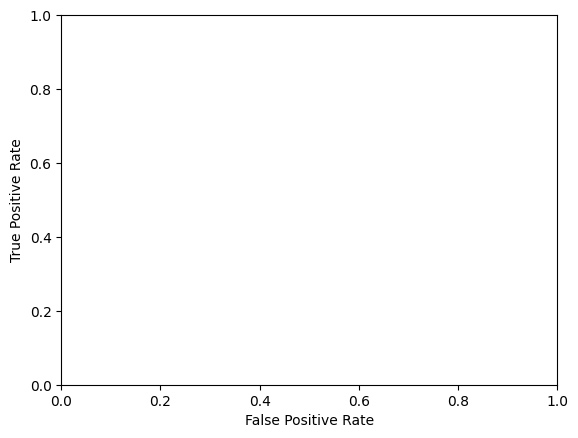

In [85]:
MetaStatistics.model_meta_function(
    [1, 2, 3, 4, 5, 6],
    store.data_train,
    store.data_test,
    ['C2', 'C3', 'C5', 'C7', 'C9', 'C11', 'C13'],
    store.tags,
    "Class",
    [3]
)

{'TP': 15, 'FP': 6, 'TN': 25, 'FN': 2}
{'TP': 16, 'FP': 7, 'TN': 24, 'FN': 1}
{'TP': 15, 'FP': 1, 'TN': 30, 'FN': 2}
{'TP': 15, 'FP': 1, 'TN': 30, 'FN': 2}
{'TP': 15, 'FP': 1, 'TN': 30, 'FN': 2}
{'TP': 16, 'FP': 1, 'TN': 30, 'FN': 1}
{'TP': 15, 'FP': 1, 'TN': 30, 'FN': 2}
-1. sen: 0.88235, esp: 0.80645, pre: 0.71429
-1. sen: 0.94118, esp: 0.77419, pre: 0.69565
-1. sen: 0.88235, esp: 0.96774, pre: 0.93750
-1. sen: 0.88235, esp: 0.96774, pre: 0.93750
-1. sen: 0.88235, esp: 0.96774, pre: 0.93750
-1. sen: 0.94118, esp: 0.96774, pre: 0.94118
-1. sen: 0.88235, esp: 0.96774, pre: 0.93750
0.03225806451612903 : 0.8823529411764706
0.03225806451612903 : 0.8823529411764706
0.03225806451612903 : 0.8823529411764706
0.03225806451612903 : 0.8823529411764706
0.1935483870967742 : 0.8823529411764706
0.03225806451612903 : 0.9411764705882353
0.22580645161290322 : 0.9411764705882353


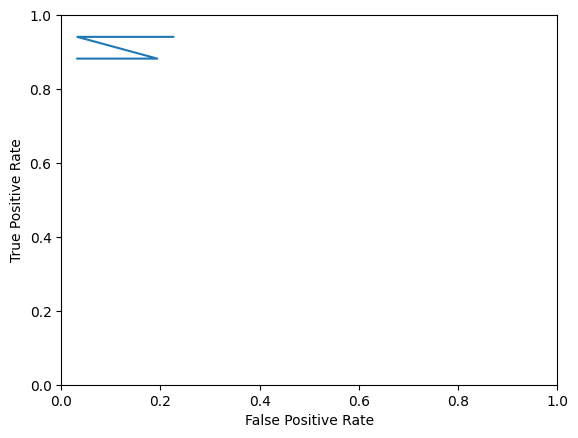

In [91]:
MetaStatistics.model_meta_function(
    [1, 2, 3, 4, 5, 6, 7],
    store.data_train,
    store.data_test,
    ['C1', 'C8', 'C9', 'C10', 'C11', 'C12'],
    store.tags,
    "Class",
    [1]
)